#  Homework 3 - Clustering, Group 12

# Student Info

| Group No | İsim  | Soyisim | Öğrenci No |
| --- | --- | --- | --- |
| 12 |Sinan | Şenocak | 090160331 |
| 12 |Furkan Berk | Efe | 090160355 |

# Introduction

1.  [Case Summary](#1)
    1. [Data Description](#2)
1.  [Importing](#3)
    1. [Importing the Libraries](#4)
    1. [Importing and Preprocessing the Data](#5)
        1. [Inspecting the Data](#6)
        1. [Cleaning the Data](#7)
1.  [Exploratory Data Analysis](#8)
    1. [Outlier Analysis](#9)
        1. [Removing the outliers from "Balance"](#10)
        1. [Removing the outliers from "Bonus_miles"](#11)
        1. [Removing the outliers from "Flight_miles_12mo"](#12)
        1. [Removing the outliers from "Qual_miles"](#13)
    1. [Finalizing the dataframe](#14)
1.  [Modelling](#15)
    1. [Normalizing the Data](#16)
    1. [Elbow Method for Determining Cluster Amount](#17)
    1. [PCA & the Silhouette Method](#18)
        1. [Running PCA of standardized data](#19)
        1. [Running PCA of MinMaxscalar data](#20)
        1. [The Sillhouette Method](#21)
        1. [Conclusion](#22)
1.  [QUESTION I : How many clusters appear to be appropriate?](#23)
    1.  [Hierarchial Clustering](#24)
    1.  [Agglomerative Clustering](#25)
    1.  [Labeling Clusters](#26)
1.  [QUESTION II - Compare the cluster centroids](#27)
    1. ...
    1. ...     
1.  [QUESTION III -  remove a random 5% of the data, and repeat the analysis](#28)
    1. [Removing 5% of the Dataset](#29)
    1. [Normalizing](#30)
    1. [Hierarchial Clustering](#31)
    1. [Agglomerative Clustering](#32)
1. [QUESTION IV : Use k-means algorithm. Does the same picture emerge?](#33)
    2. [Building Unsupervised k-means Model](#34)
    2. [Analyzing Cluters](#35) 
1. [QUESTION V : Which clusters would you target for offers, and what type of offers would you target to customers in that cluster?](#36)
    1. ...
    1. ...
    1. ...
1. [Conclusion](#6)

<a id = "1"></a>
# 1) Case Summary

East-West Airlines is trying to learn more about its customers.  Key issues are their flying patterns, earning and use of frequent flyer rewards, and use of the airline credit card. The task is to identify customer segments via clustering. The file EastWestAirlines.xls contains information on 4000 passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. __The goal is to try to identify clusters of passengers that have similar charactersitics for the purpose of targeting different segments for different types of mileage offers.__

Please prepare a notebook including answers to each of the following questions:

1. Apply hierarchical clustering with Euclidean distance and complete linkage. How many clusters appear to be appropriate? (___25 points___)

2. Compare the cluster centroids to characterize the different clusters and try to give each cluster a label. (___20 points___)

3. To check the stability of the clusters, remove a random 5% of the data (by taking a random sample of 95% of the records, namely 200 records), and repeat the analysis. Does the same picture emerge? Use 425 as the seed. (___10 points___)

4. Use k-means algorithm with the number of clusters you found in part (a). Does the same picture emerge? (___25 points___)

5. Which clusters would you target for offers, and what type of offers would you target to customers in that cluster? (___20 points___)

Below we provided you with a list of libraries that might be useful for your case study. This list is only a sample of what you might need; you are free to use any additional library serving your purpose.


<a id = "2"></a>
## 1.A) Data Description

- __Field Name__=ID#;	__Data Type__=NUMBER;	__Description__=Unique ID
- __Field Name__=Balance;	__Data Type__=NUMBER;	__Description__=Number of miles eligible for award travel
- __Field Name__=Qual_miles;	__Data Type__=NUMBER;	__Description__=Number of miles counted as qualifying for Topflight status
- __Field Name__=cc1_miles;	__Data Type__=CHAR;	__Description__=Number of miles earned with freq. flyer credit card in the past 12 months:
- __Field Name__=cc2_miles;	__Data Type__=CHAR;	__Description__=Number of miles earned with Rewards credit card in the past 12 months:
- __Field Name__=cc3_miles;	__Data Type__=CHAR;	__Description__=Number of miles earned with Small Business credit card in the past 12 months:
- For cc1_miles,cc2_miles and cc3_miles bins mean following ranges:
        - 1 = under 5,000
        - 2 = 5,000 - 10,000
        - 3 = 10,001 - 25,000
        - 4 = 25,001 - 50,000
        - 5 = over 50,000
- __Field Name__=Bonus_miles;	__Data Type__=NUMBER;	__Description__=Number of miles earned from non-flight bonus transactions in the past 12 months
- __Field Name__=Bonus_trans;	__Data Type__=NUMBER;	__Description__=Number of non-flight bonus transactions in the past 12 months
- __Field Name__=Flight_miles_12mo;	__Data Type__=NUMBER;	__Description__=Number of flight miles in the past 12 months
- __Field Name__=Flight_trans_12;	__Data Type__=NUMBER;	__Description__=Number of flight transactions in the past 12 months
- __Field Name__=Days_since_enroll;	__Data Type__=NUMBER;	__Description__=Number of days since Enroll_date
- __Field Name__=Award?;	__Data Type__=NUMBER;	__Description__=Dummy variable for Last_award (1=not null, 0=null)

<a id = "3"></a>
# 2) Importing

<a id = "4"></a>
## 2.A) Importing the Libraries

In [1]:
# importing  libraries for general use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to help with visualization

from matplotlib.pyplot import xticks
%matplotlib inline

In [3]:
# libraries for machine learning

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [4]:
# To perform Hierarchical clustering

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram
from sklearn.metrics import silhouette_score

In [5]:
# Data display coustomization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-5-ed05c671ab16>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [6]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

<a id = "5"></a> 
##  2.B) Importing & Preprocessing the Data

In [8]:
# importing the data using .read_excel

df = pd.read_excel('EastWestAirlines.xls',sheet_name='data')

<a id = "6"></a> 
### 2.B.a) Inspecting the Data

In [9]:
# first 5 rows

df.head(5)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
# the dimensions of the dataframe

df.shape

(3999, 12)

In [11]:
# info on data types & null count

# no null values seem to exist.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [12]:
# statistical info for every feature

df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [13]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take

unique_cc1 = df.cc1_miles.unique()
unique_cc2 = df.cc2_miles.unique()
unique_cc3 = df.cc3_miles.unique()

print(unique_cc1)
print(unique_cc2)
print(unique_cc3)

[1 4 3 2 5]
[1 2 3]
[1 3 2 4 5]


<a id = "7"></a> 
### 2.B.b) Cleaning the Data (if needed)

In [14]:
# null count for columns

null_count_col = df.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (df.isnull().sum() * 100 / len(df)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    12
dtype: int64 

Null Percentage for Columns:

 0.0    12
dtype: int64


In [15]:
# null count for rows

null_count_row = df.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (df.isnull().sum(axis=1) * 100 / len(df)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    3999
dtype: int64 

Null Percentage for Rows:

 0.0    3999
dtype: int64


There are no missing / Null values either in columns or rows, so we can move on to the next step, which is Exploratory Data Analysis.

<a id = "8"></a> 
# 3) Exploratory Data Analysis

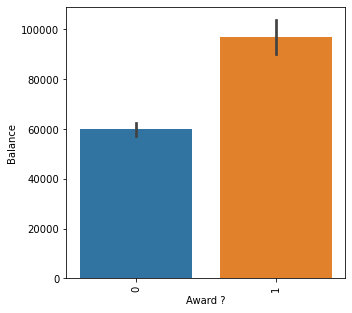

In [16]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = df[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award ?', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [17]:
# what is correlated with Balance?

corr_matrix = df.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
ID                  -0.243737
Name: Balance, dtype: float64

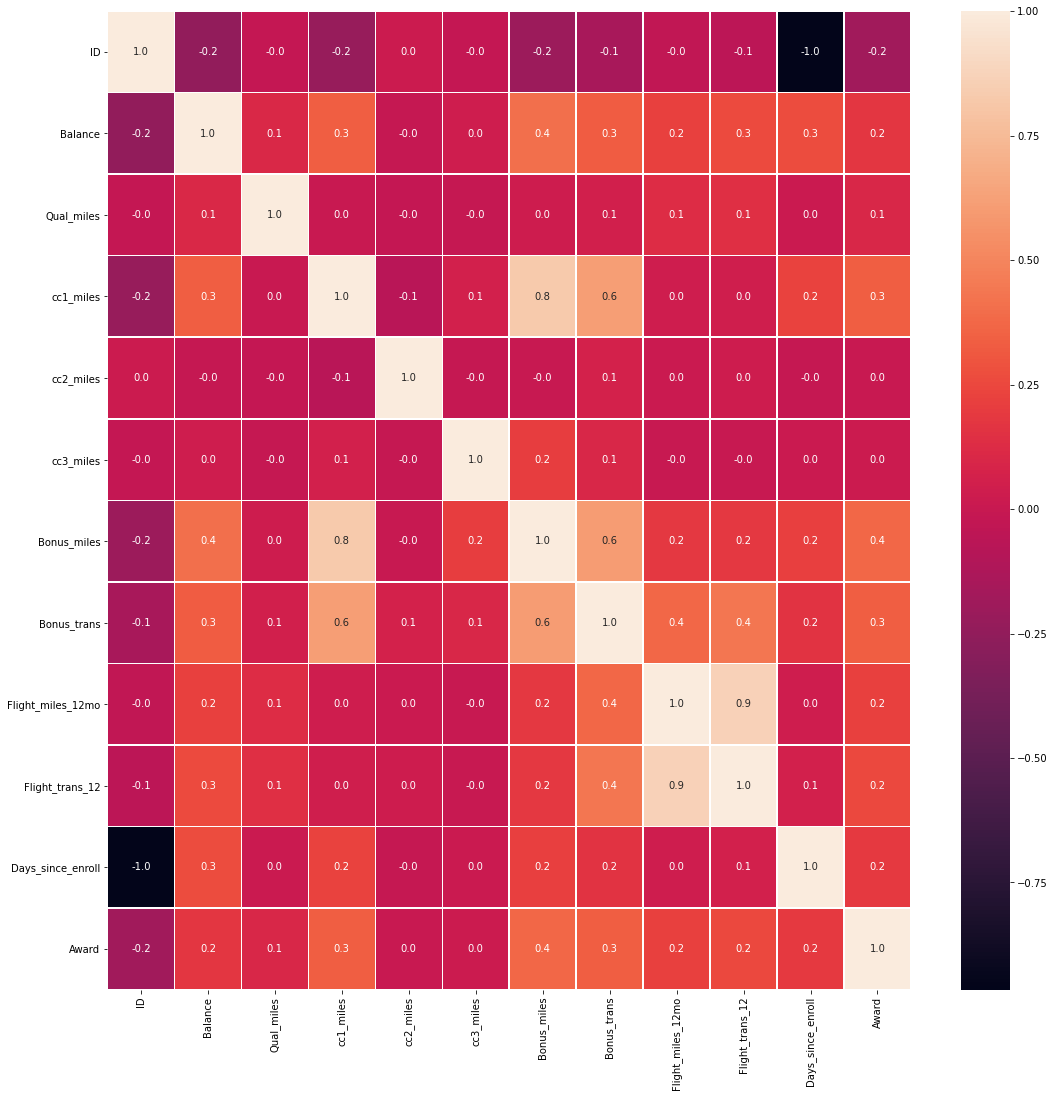

In [18]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Unique points in this correlation matrix:

- ID# is negatively correlated with days_since_enroll
- flight_trans_12 is positively correlated with flight_miles_12mo
- bonus_trans is positively correlated with cc1_miles 
- bonus_trans is positively correlated with bonus_miles
- bonus_miles is positively correlated with cc1_miles

In other words, the following are positively correlated

- Unique ID <-> Number of days since Enroll_date
- Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months
- Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions
- Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions
- Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card

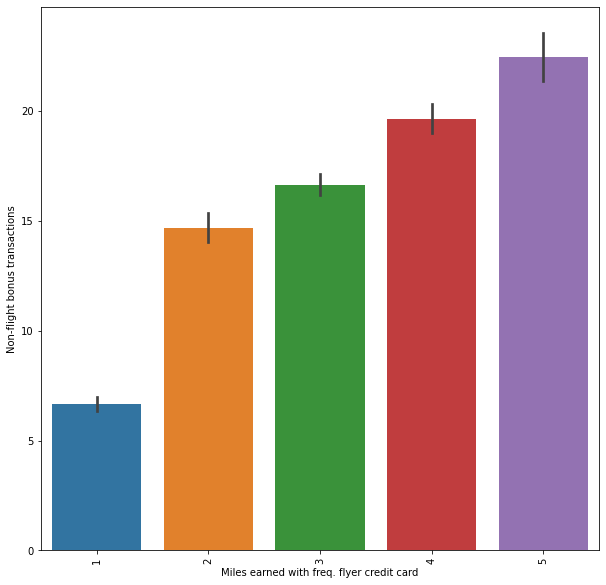

In [19]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

People who fly more frequently use bonus transactions more

ID


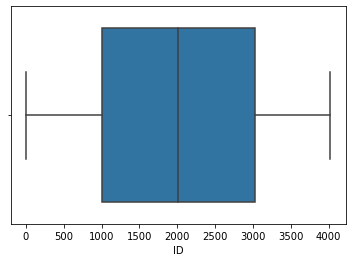

Balance


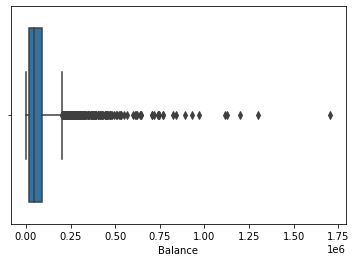

Qual_miles


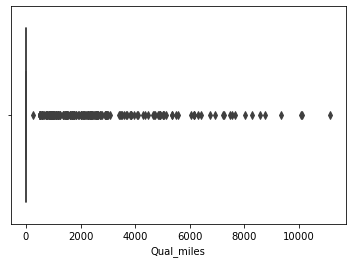

cc1_miles


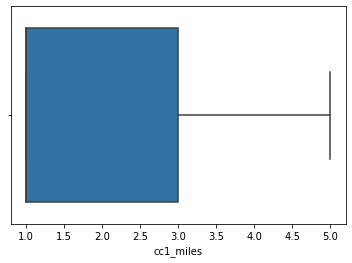

cc2_miles


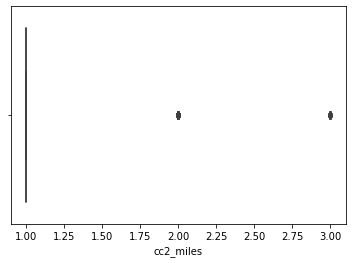

cc3_miles


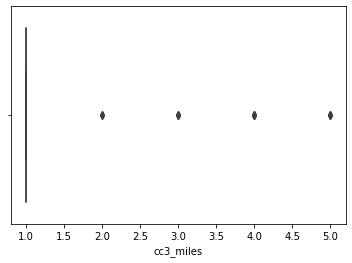

Bonus_miles


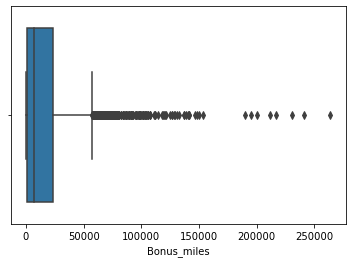

Bonus_trans


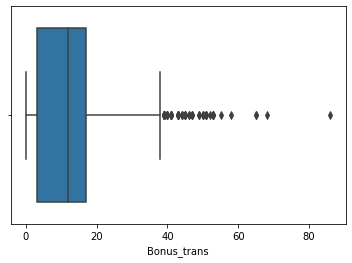

Flight_miles_12mo


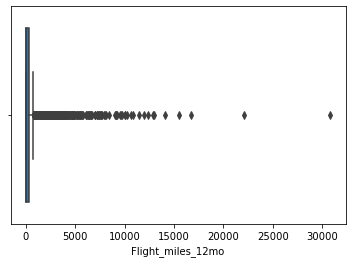

Flight_trans_12


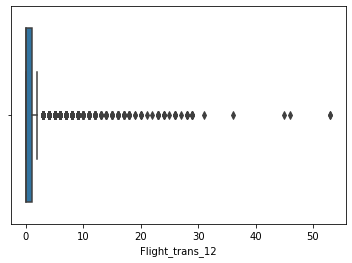

Days_since_enroll


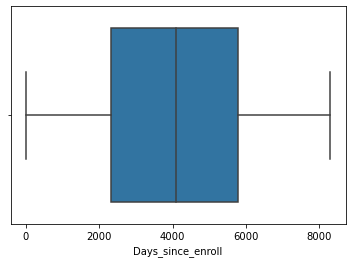

Award


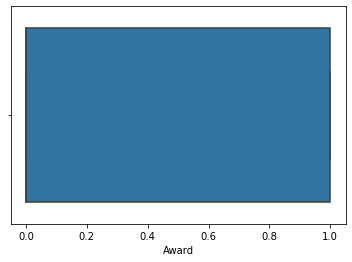

In [20]:
  # Box Plot for every feature, singled out
    
for n in df.columns:
    print(n)
    sns.boxplot(df[n])
    plt.show()

<a id = "9"></a> 
## 3.A) Outlier Analysis

<AxesSubplot:>

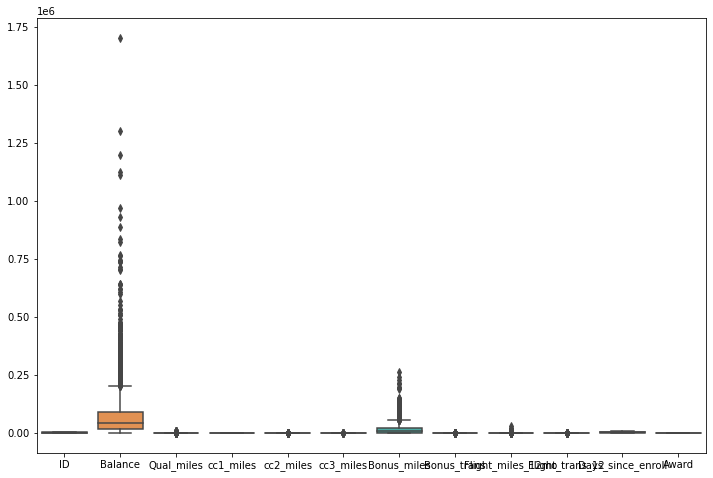

In [21]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=df)

<AxesSubplot:>

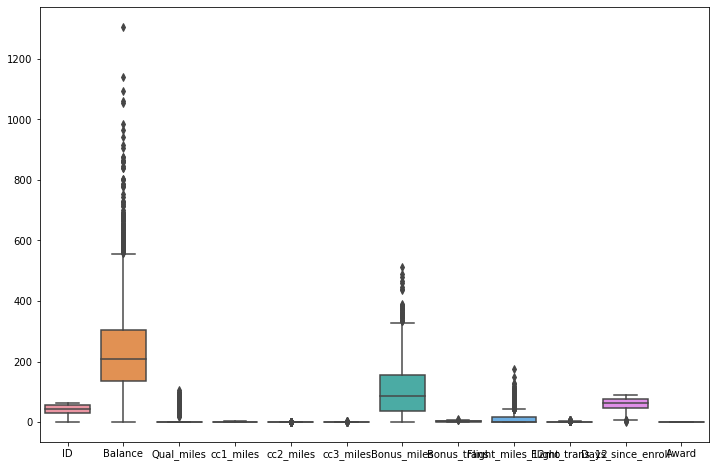

In [23]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df))

In [24]:
df.head(100)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,98,16796,0,1,1,1,2875,16,0,0,6773,0
96,99,57346,0,1,1,1,5560,23,0,0,6766,0
97,100,102062,0,4,1,1,44247,16,0,0,6758,0
98,101,22324,0,1,1,1,1375,4,0,0,6753,0


<a id = "10"></a> 
## 3.A.a) Removing the outliers from "Balance"

In [26]:
# removing the outliers from Balance

q1 = df['Balance'].quantile(0.25)
q3 = df['Balance'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df1 = df[(df['Balance']>ll)&(df['Balance']<ul)]

df1.head(100)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
105,108,3734,0,5,1,1,61096,18,150,2,6760,1
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1
107,110,43498,0,1,1,1,0,0,0,0,6759,1
108,111,84674,0,4,1,1,46335,14,50,1,6738,1


Even in this small sample, we can see that the last few lines of df1.head() are different, so removing the outliers seems to have worked. Now to visualize;

<AxesSubplot:>

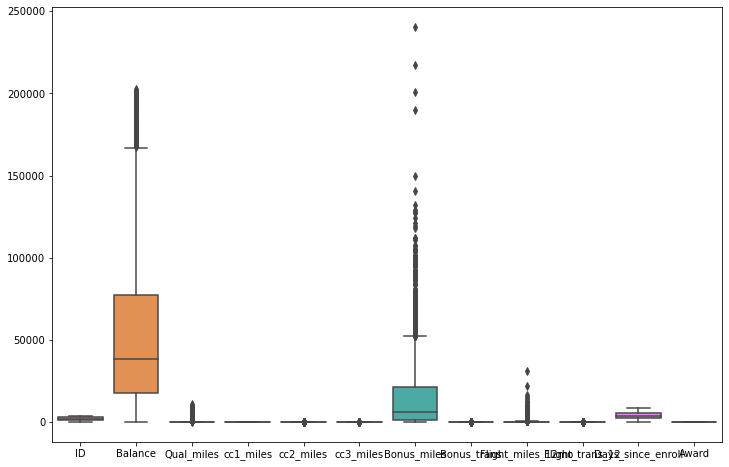

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1)

In [28]:
df_shape = df.shape

df1_shape = df1.shape

print("shape of original dataframe:", df_shape, "\n")
print("shape of new dataframe:", df1_shape)

shape of original dataframe: (3999, 12) 

shape of new dataframe: (3733, 12)


<a id = "11"></a> 
## 3.A.b) Removing the outliers from "Bonus_miles"

In [29]:
# removing outliers from Bonus_miles:

q1 = df['Bonus_miles'].quantile(0.25)
q3 = df['Bonus_miles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df2 = df1[(df1['Bonus_miles']>ll)&(df1['Bonus_miles']<ul)]

<AxesSubplot:>

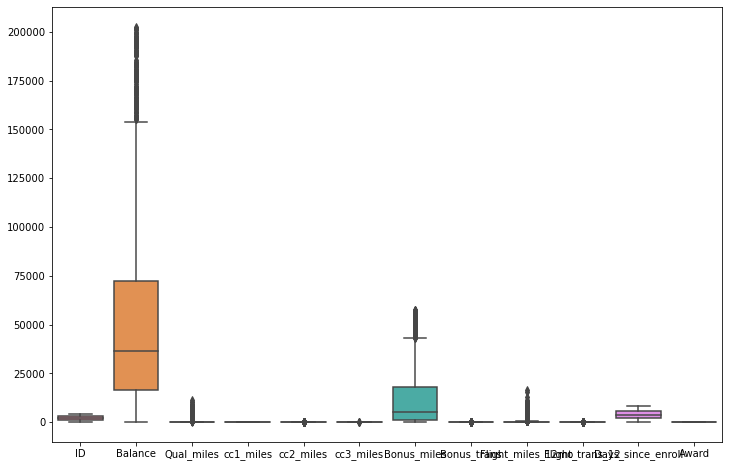

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df2)

<a id = "12"></a> 
## 3.A.c) Removing the outliers from "Flight_miles_12mo"

In [32]:
# Removing outliers from Flight_miles_12mo

q1 = df['Flight_miles_12mo'].quantile(0.25)
q3 = df['Flight_miles_12mo'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df3 = df2[(df2['Flight_miles_12mo']>ll)&(df2['Flight_miles_12mo']<ul)]

<AxesSubplot:>

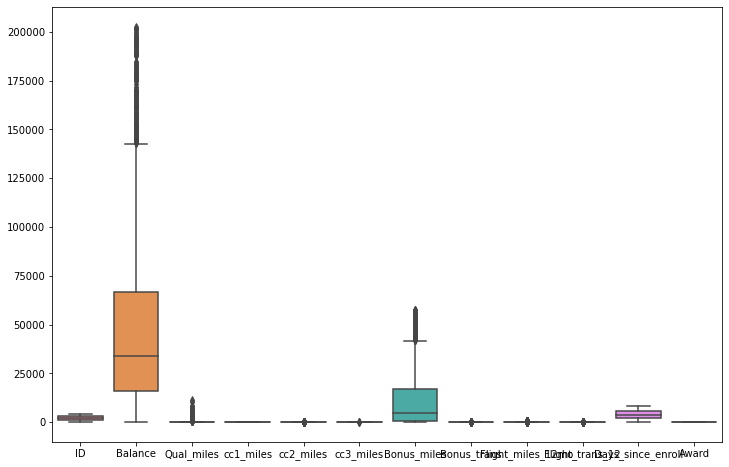

In [33]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df3)

<a id = "13"></a> 
## 3.A.d) Removing the outliers from "Qual_miles"

In [34]:
q1 = df['Qual_miles'].quantile(0.25)
q3 = df['Qual_miles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df4 = df3[(df3['Qual_miles']>ll)&(df3['Qual_miles']<ul)]

<AxesSubplot:>

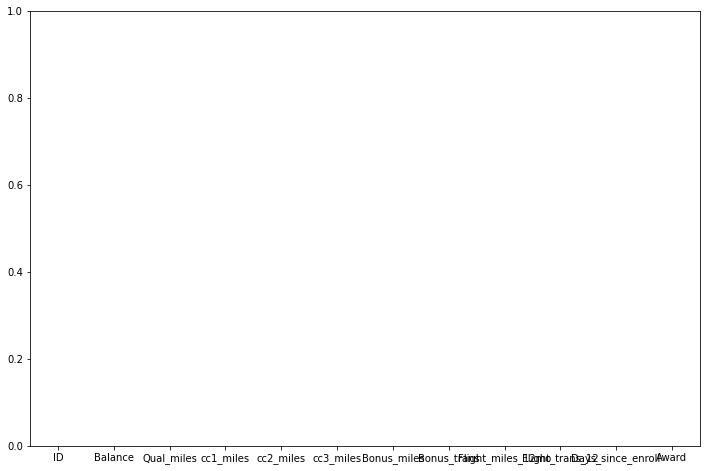

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df4)

<AxesSubplot:xlabel='Qual_miles'>

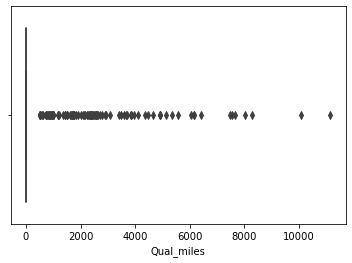

In [36]:
sns.boxplot(df3['Qual_miles'])

The amount of outliers Qual_miles has seems too many (therefore too important) to be removed, so we continue with df3.

In [38]:
df3.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0


<a id = "14"></a> 
## 3.B) Finalizing the dataframe

In [39]:
# we know ID & award will not make much contribution during clutering. we will drop both columns.

dataset1 =  df3.drop(['ID','Award'], axis=1)
dataset1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
5,16420,0,1,1,1,0,0,0,0,6942


<AxesSubplot:>

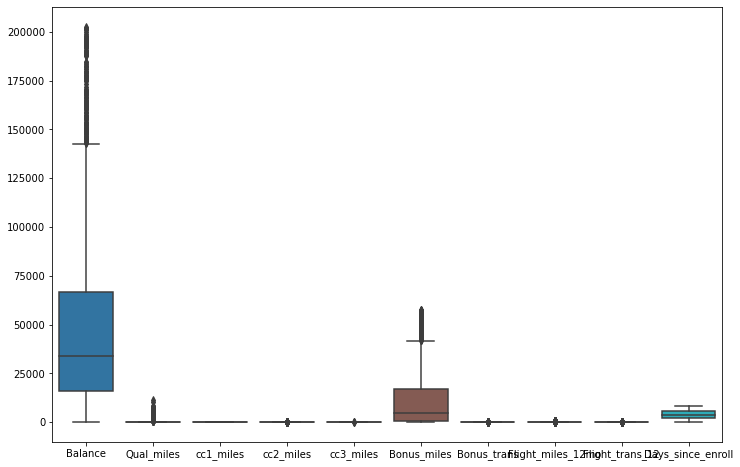

In [41]:
# our final boxgraphs with ID & Award removed

plt.figure(figsize=(12,8))
sns.boxplot(data=dataset1)

Balance


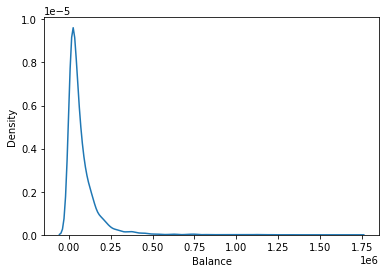

Qual_miles


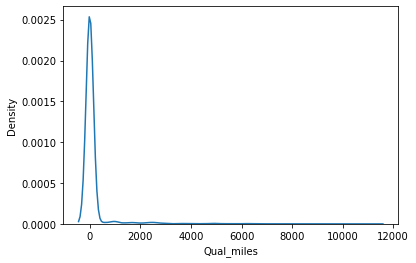

cc1_miles


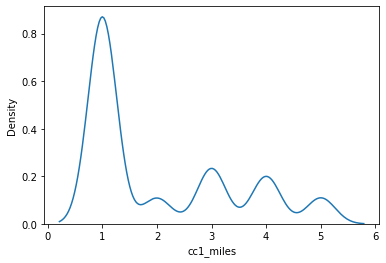

cc2_miles


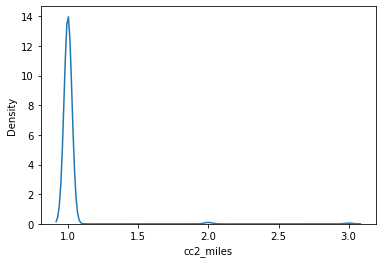

cc3_miles


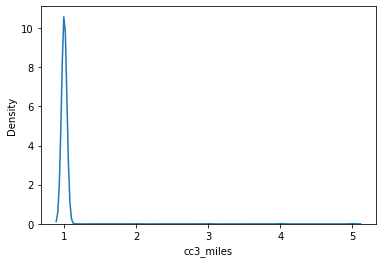

Bonus_miles


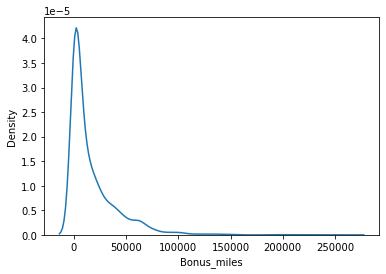

Bonus_trans


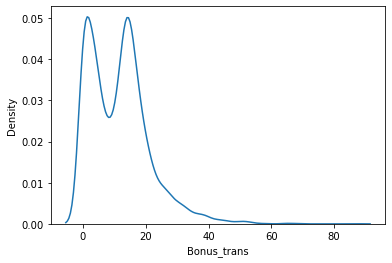

Flight_miles_12mo


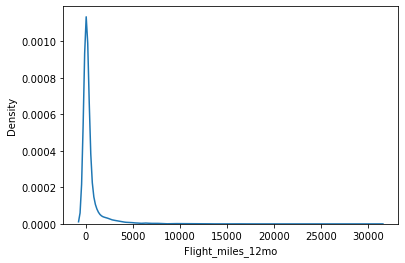

Flight_trans_12


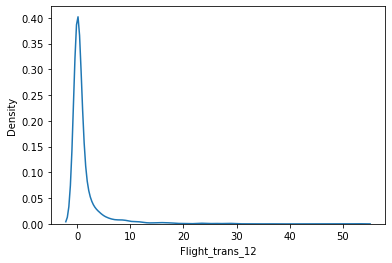

Days_since_enroll


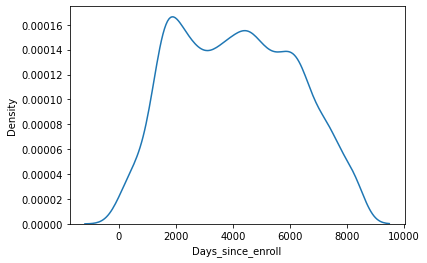

In [42]:
  # Kernel Density for every feature, singled out

for n in dataset1.columns:
    print(n)
    sns.kdeplot(df[n])
    plt.show()

<a id = "15"></a>
# 4 -  Modelling

<a id = "16"></a>
## 4.A) Normalizing the Data

In [52]:
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(dataset1)
df_norm.shape

(3105, 10)

In [46]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})

In [47]:
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,31050.000000
1,2,24457.464962
2,3,20678.263821
3,4,17960.663779
4,5,15888.898767
5,6,14171.493387
6,7,12121.623711
7,8,10947.620366
8,9,10074.047043
9,10,9321.133143


<a id = "17"></a>
## 4.B) Elbow Method for Determining Cluster Amount

Text(0, 0.5, 'Cluster Errors')

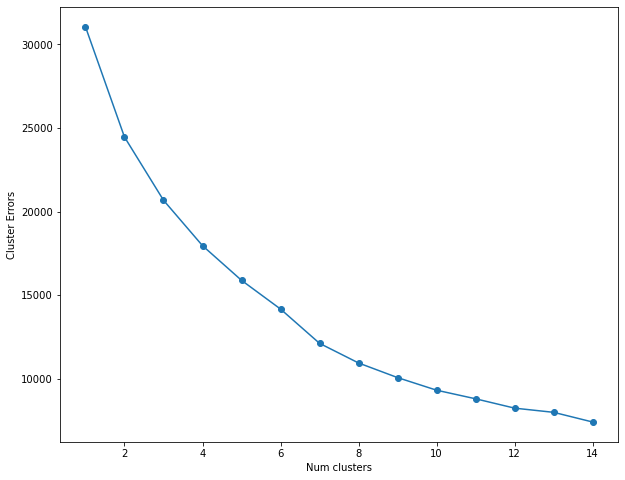

In [51]:
# "Elbow" plot, clusters vs. errors
plt.figure(figsize=(10,8))
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o')
plt.xlabel('Num clusters')
plt.ylabel('Cluster Errors')

The optimal number of clusters is 7, as seen from elbow curve.

<a id = "18"></a>
## 4.C) PCA & the Silhouette Method 

<a id = "19"></a>
### 4.C.a) Running PCA of normalized data.

In [61]:
# applying PCA on std_df

# we consider 0.95 variance in n_components to not lose any data.

from sklearn.decomposition import PCA

pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df = pca_std.fit_transform(df_norm)

In [62]:
# eigenvalues

print(pca_std.singular_values_)

[93.47111964 74.7912179  56.44863914 55.83228315 55.63692717 55.0128613
 44.8698796  37.59849223]


In [63]:
#  variance contained in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[28.13800389 18.0152215  10.26231517 10.03943266  9.96930005  9.74690792
  6.4840776   4.55280714]


In [64]:
# Cummulative variance ratio

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([28.13800389, 46.15322539, 56.41554056, 66.45497322, 76.42427326,
       86.17118118, 92.65525878, 97.20806592])

Applying PCA on standardized data with 95% variance gives 8 PCA components 

<a id = "20"></a>
### 4.C.b) Running PCA of MinMaxscalar data.

In [66]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(dataset1)
minmax_df.shape

(3105, 10)

In [67]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [68]:
# eigenvalues

print(pca_minmax.singular_values_)

[22.39660889 13.63099503 13.10616173  9.71410745  6.67146314  4.76875804]


In [69]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[47.5446088  17.61131825 16.28125175  8.94422163  4.21870277  2.15549649]


Applying PCA on MinMaxscaler transformation data gives 5 PCA components.

<a id = "21"></a>
### 4.C.c) The Sillhouette Method

In [71]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [72]:
# With the elbow method, the ideal number of clusters to use was 7.
# We will also use the Silhouette score to determine an optimal number.

#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardized data with PCA applied.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3227080569502103
For n_clusters = 3 The average silhouette_score is : 0.3519025757855698
For n_clusters = 4 The average silhouette_score is : 0.36571432220083205
For n_clusters = 5 The average silhouette_score is : 0.3660202158988065
For n_clusters = 6 The average silhouette_score is : 0.37484004576849084
For n_clusters = 7 The average silhouette_score is : 0.2662076873028101
For n_clusters = 8 The average silhouette_score is : 0.2579994485885965
For n_clusters = 9 The average silhouette_score is : 0.2709031175969232


In [73]:
# Silhouette score for MinMaxScalar transformation data with PCA Applied.

for n_clusters in clust_list:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels2 = clusterer1.fit_predict(pca_minmax_df)
    sil_score2= silhouette_score(pca_std_df, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

For n_clusters = 2 The average silhouette_score is : 0.23411238274086058
For n_clusters = 3 The average silhouette_score is : 0.23411238274086058
For n_clusters = 4 The average silhouette_score is : 0.23411238274086058
For n_clusters = 5 The average silhouette_score is : 0.23411238274086058
For n_clusters = 6 The average silhouette_score is : 0.23411238274086058
For n_clusters = 7 The average silhouette_score is : 0.23411238274086058
For n_clusters = 8 The average silhouette_score is : 0.23411238274086058
For n_clusters = 9 The average silhouette_score is : 0.23411238274086058


<a id = "22"></a>

## 4.C.d) Conclusion: 

According the the silhouette score of:

- The standardized data, the ideal number of clusters is 6, with a score higher than other options, of 0.37

- The MinMaxScalar transformation data, it is the same for any number of cluster, and is equal to 0.23
0.37 > 0.23, therefore we proceed with the standardized data with 6 clusters

<a id = "23"></a>
# 5 - QUESTION I : Apply hierarchical clustering, How many clusters appear to be appropriate?

- Apply hierarchical clustering with Euclidean distance and complete linkage. How many clusters appear to be appropriate? (___25 points___)

<a id = "24"></a>
## 5.1) Hierarchial Clustering

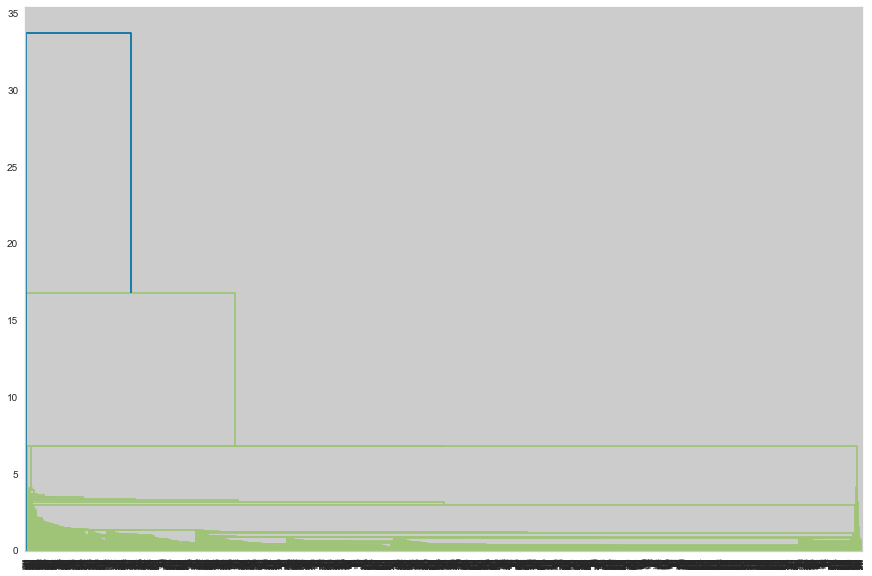

In [75]:
# Hierarchial Clustering:
plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

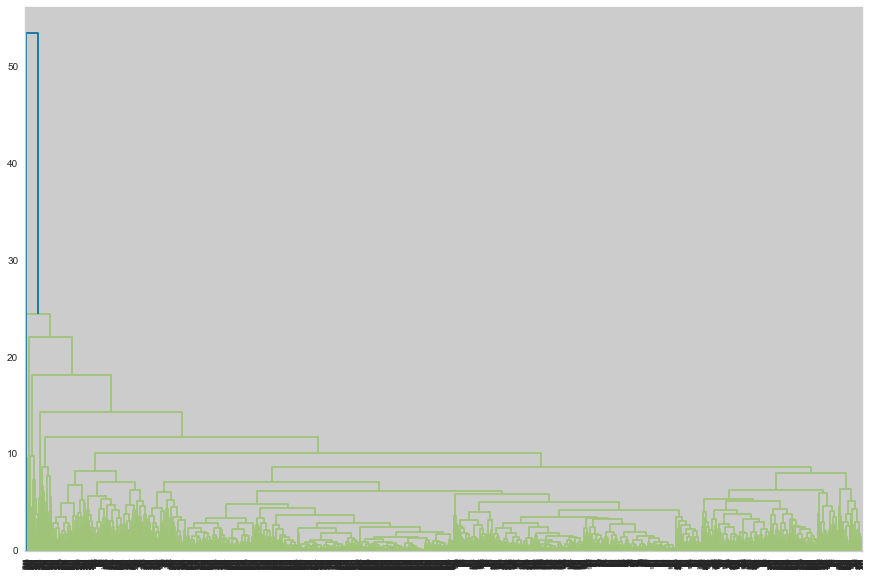

In [76]:
# Hierarchial Clustering with complete linkage as instructed:

plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

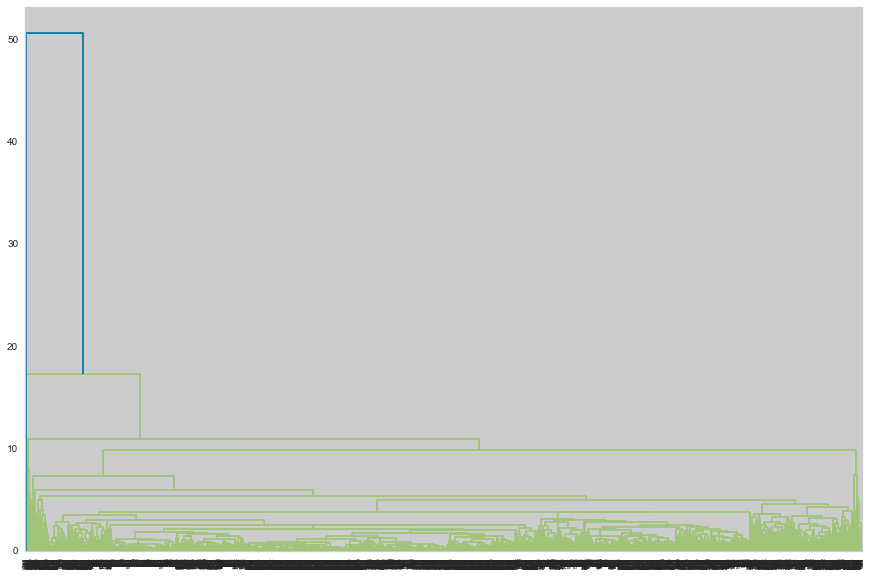

In [146]:
# Hierarchial Clustering with average linkage:

plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='average',metric='euclidean')
dendrogram(mergings)
plt.show()

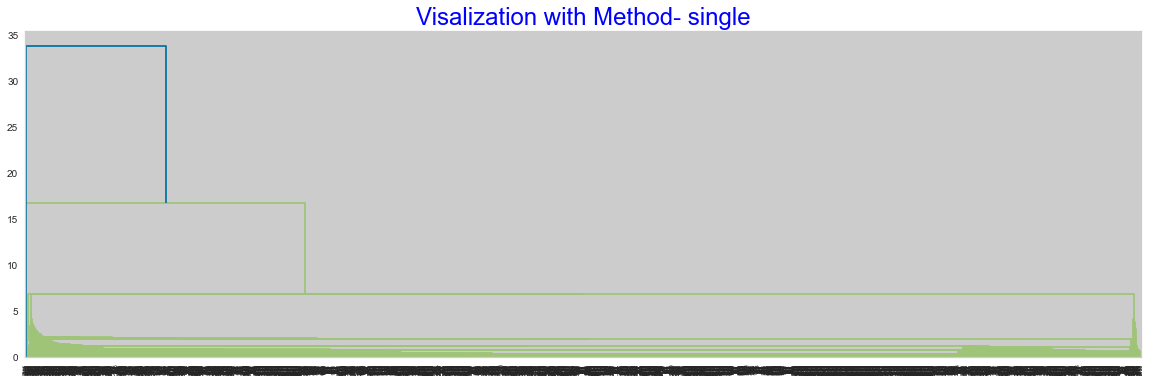

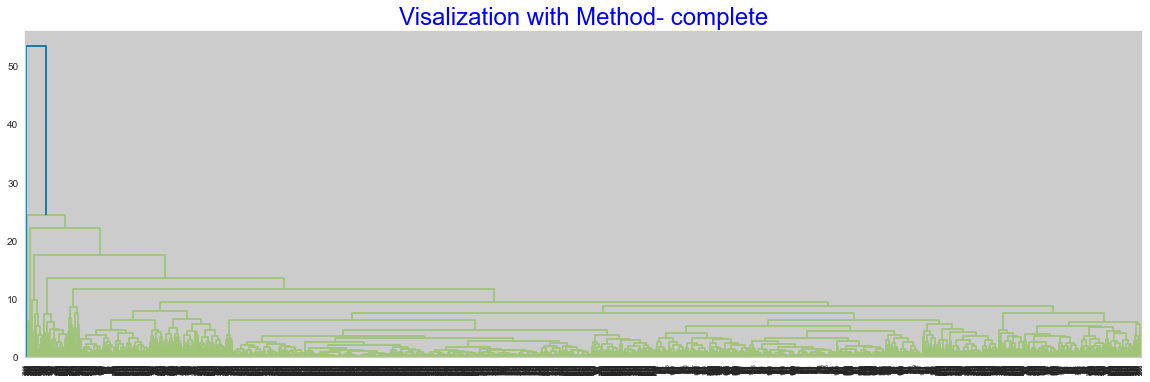

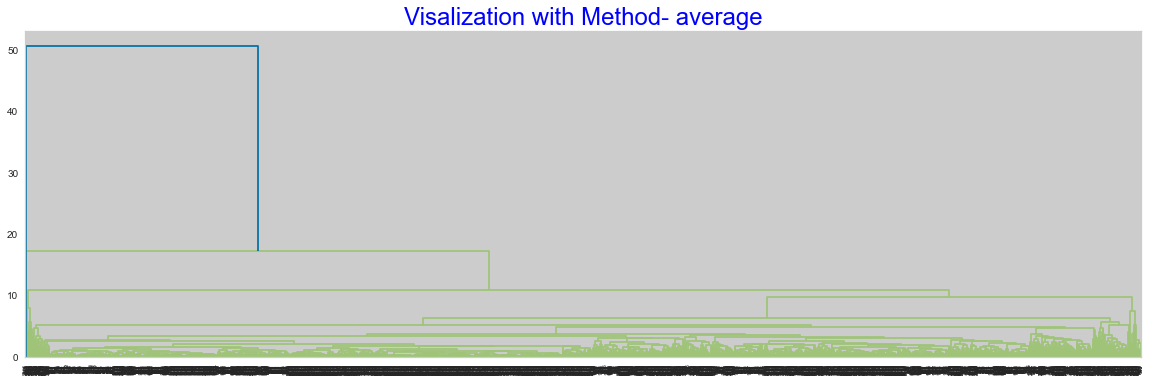

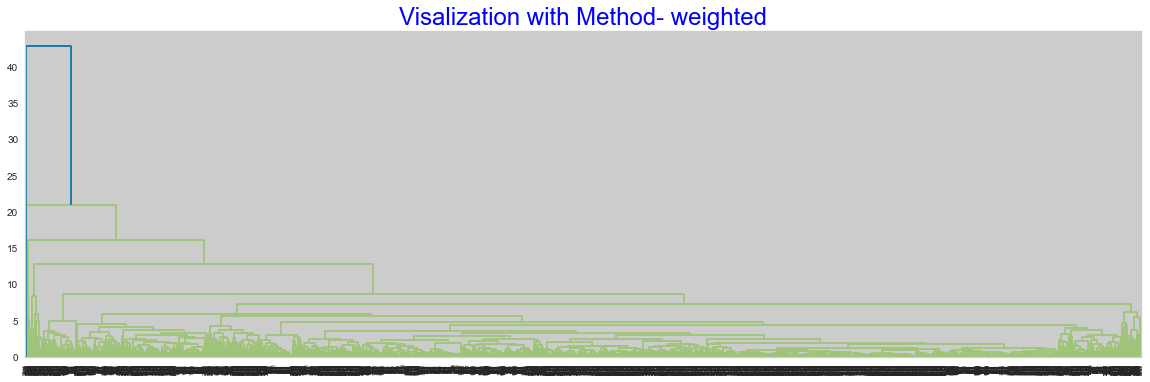

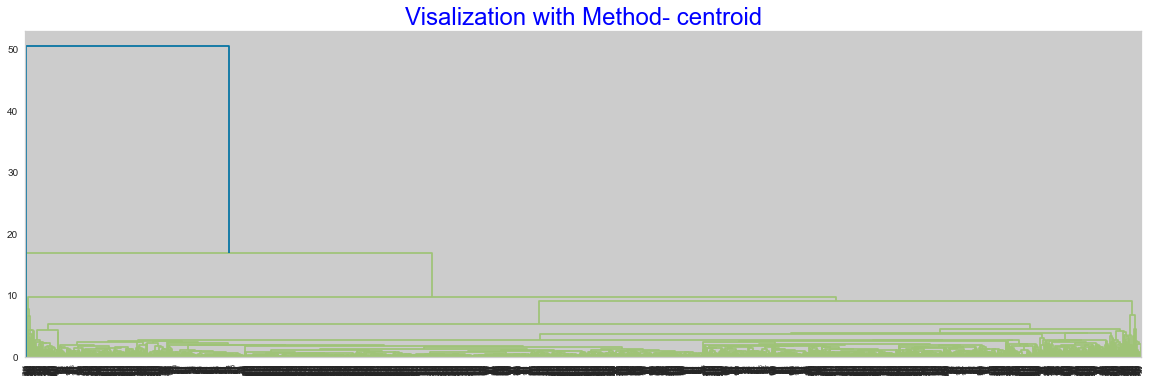

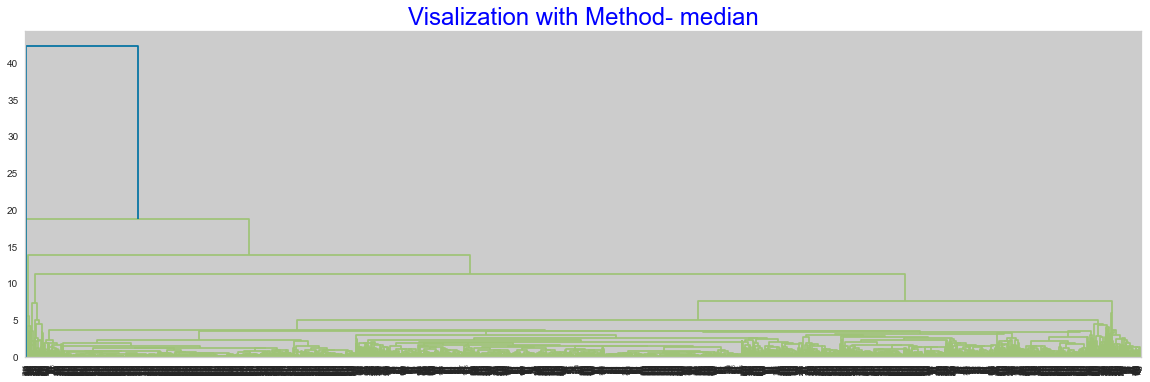

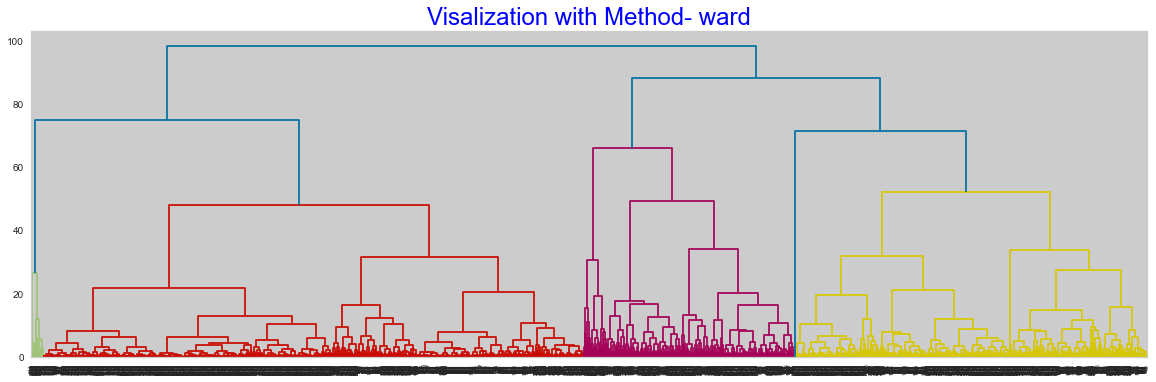

In [81]:
# Applying Dendrogram on PCA data using different linkage methods. 
# We can see number of clusters using color coding of dendrogram. Each color indicates one cluster.

import scipy.cluster.hierarchy as shc
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visalization with Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = shc.dendrogram(shc.linkage(pca_std_df, method = methods,optimal_ordering=False))

### The color seperation in Ward Method indicate that 5 is the optimal number for clusters.

<a id = "25"></a>
## 5.2) Agglomerative Clustering:

In [86]:
agg_clustering = AgglomerativeClustering(n_clusters=7, linkage='average')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3105,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
print("Cluster labels for each point:", agg_clustering.labels_, "\n")
print("Number of leaves in the hierarchical tree:", agg_clustering.n_leaves_, "\n")
print("The estimated number of connected components in the graph:", agg_clustering.n_connected_components_, "\n")
print("The children of each non-leaf node:\n", agg_clustering.children_, "\n")
print("Clustering Score:", (silhouette_score(pca_std_df, agg_clustering.labels_)*100).round(3))

Cluster labels for each point: [0 0 0 ... 0 0 0] 

Number of leaves in the hierarchical tree: 3105 

The estimated number of connected components in the graph: 1 

The children of each non-leaf node:
 [[2552 2997]
 [ 832  923]
 [2057 2455]
 ...
 [6204 6205]
 [6178 6206]
 [2216 6207]] 

Clustering Score: 56.387


<a id = "26"></a>
## 5.3) Labeling Clusters

In [117]:
# Creating dataframe of cluster lables..

hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [124]:
# Concating model1_Cluster df with main dataset copy

hie_df = pd.concat([dataset1.copy(), hie_cluster], axis=1)
hie_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Hie_Clustering
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


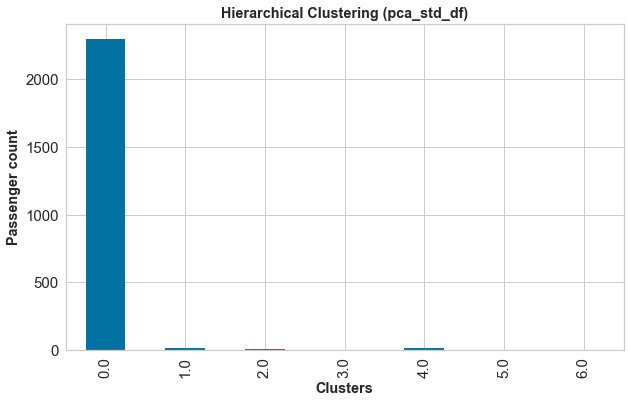

In [134]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
hie_df.groupby(['Hie_Clustering']).count()['Days_since_enroll'].plot(kind='bar')
plt.ylabel('Balance Labels')
plt.title('Hierarchical Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Passenger count', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [131]:
hie_df.groupby(['Hie_Clustering']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Hie_Clustering,,,,,,,,,,
0.0,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295
1.0,14,14,14,14,14,14,14,14,14,14
2.0,9,9,9,9,9,9,9,9,9,9
3.0,1,1,1,1,1,1,1,1,1,1
4.0,16,16,16,16,16,16,16,16,16,16
5.0,1,1,1,1,1,1,1,1,1,1
6.0,2,2,2,2,2,2,2,2,2,2


In [ ]:
Hierarchi

## REST IS ANSWERING THE QUESTION, THIS SECTION IS NOTI YET FINISHED

<a id = "27"></a>
# 6 -  QUESTION II - Compare the cluster centroids


- Compare the cluster centroids to characterize the different clusters and try to give each cluster a label. (___20 points___)

<a id = "28"></a>
# 7 -  QUESTION III -  Remove a random 5% of the data, and repeat the analysis
- To check the stability of the clusters, remove a random 5% of the data (by taking a random sample of 95% of the records, namely 200 records), and repeat the analysis. Does the same picture emerge? Use 425 as the seed. (___10 points___)

<a id = "29"></a>
## 7.1) Removing 5% of the Dataset

In [78]:
dataset1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
5,16420,0,1,1,1,0,0,0,0,6942
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [135]:
dataset1.shape

(3105, 10)

In [136]:
five_percent = 3105/20
five_percent

155.25

In [138]:
np.random.seed(425)

remove_n = 155
drop_indices = np.random.choice(dataset1.index, remove_n, replace=False)
df_95_percent = dataset1.drop(drop_indices)

# our new dataset with 5% removed

df_95_percent

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
5,16420,0,1,1,1,0,0,0,0,6942
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


#### Now we apply the same procedure to the 95% of the dataset to see changes, as instructed.

<a id = "30"></a>
## 7.2) Normalizing

In [139]:
df_95_percent.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
5,16420,0,1,1,1,0,0,0,0,6942


In [142]:
df_norm2 = standard_scaler.fit_transform(df_95_percent)

In [143]:
from sklearn.cluster import KMeans
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df_norm2)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})

<a id = "31"></a>
## 7.3) Hierarchial Clustering

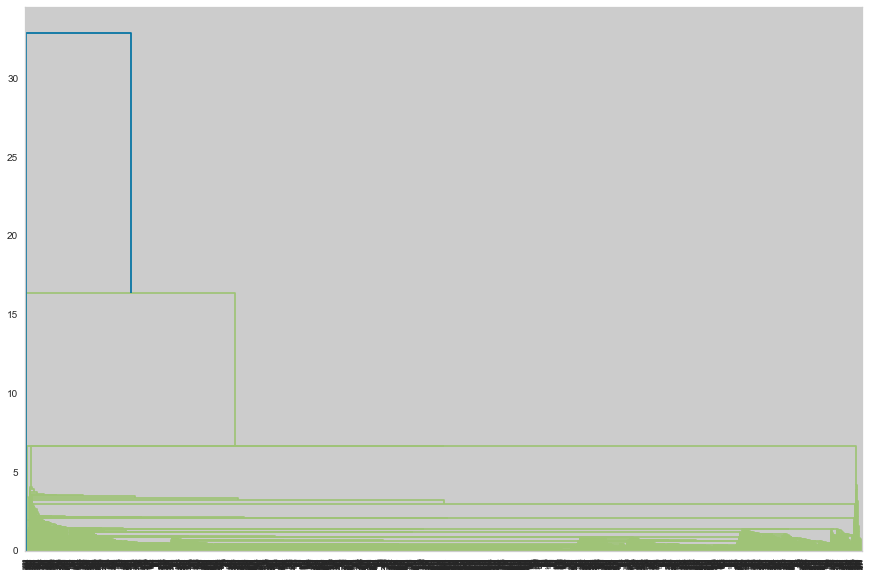

In [173]:
#Hierarchial Clustering:
plt.figure(figsize=(15,10))
mergings = linkage(df_norm2, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

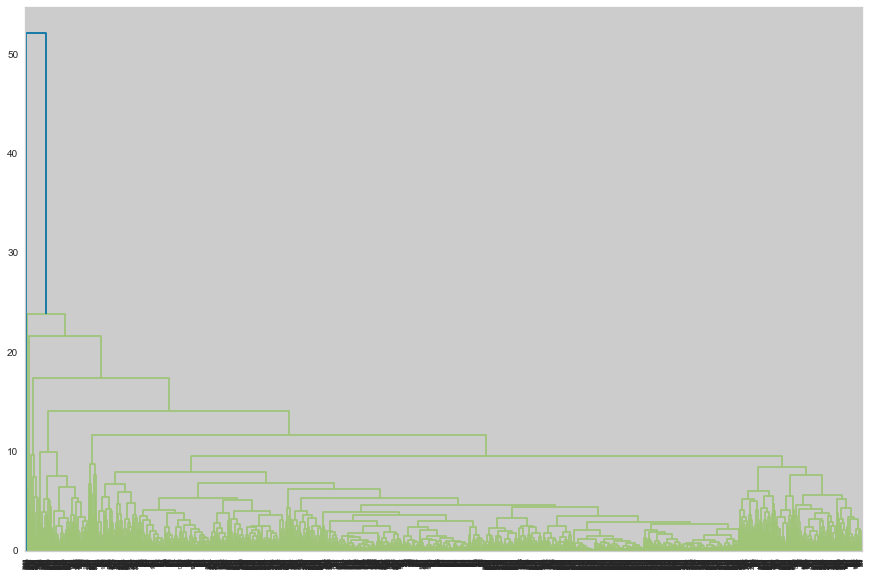

In [145]:
plt.figure(figsize=(15,10))
mergings = linkage(df_norm2, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

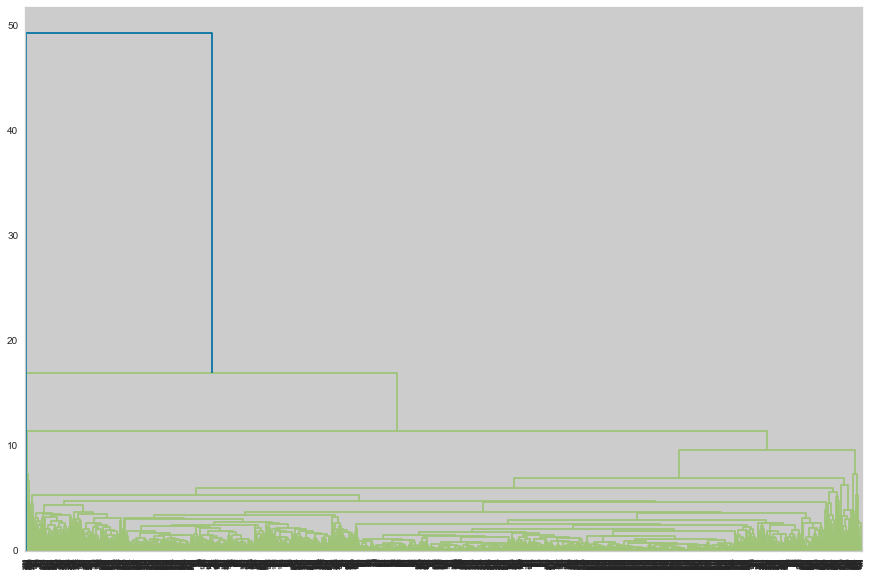

In [149]:
plt.figure(figsize=(15,10))
mergings = linkage(df_norm2, method='average',metric='euclidean')
dendrogram(mergings)
plt.show()

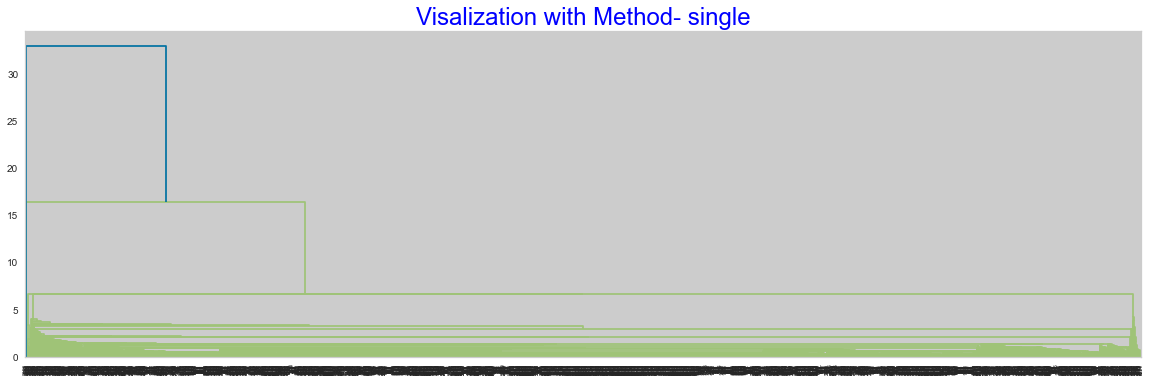

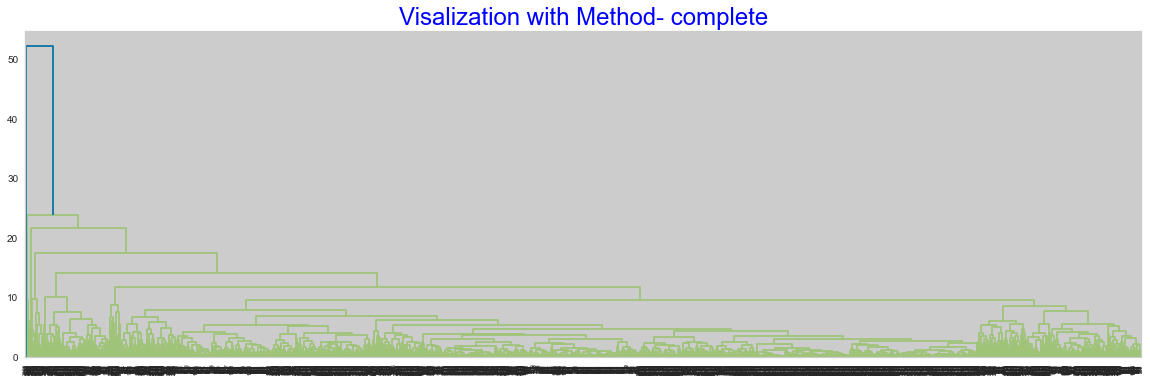

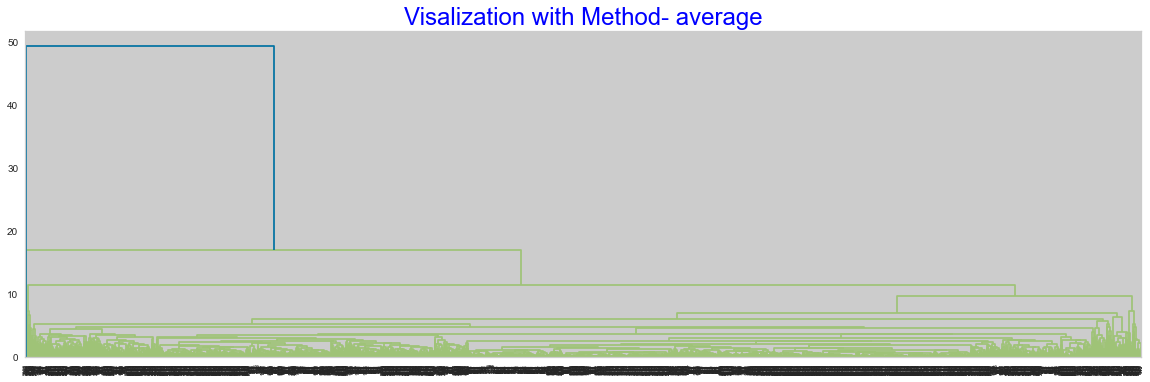

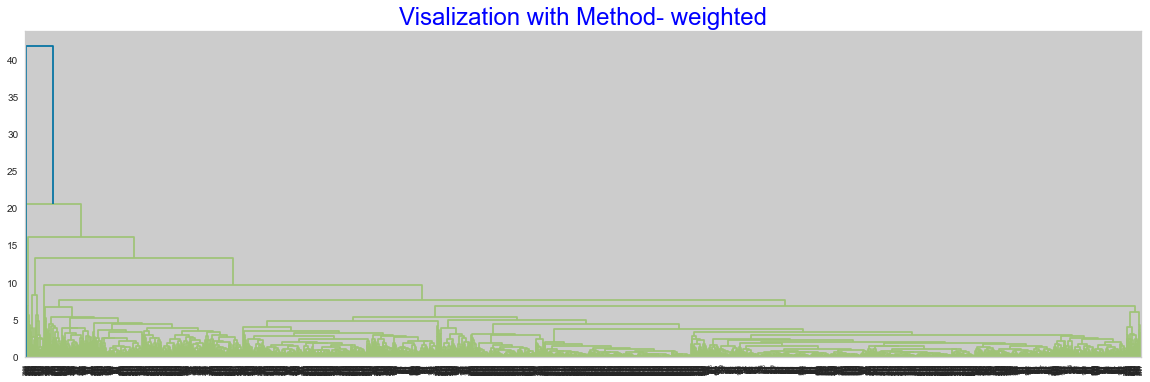

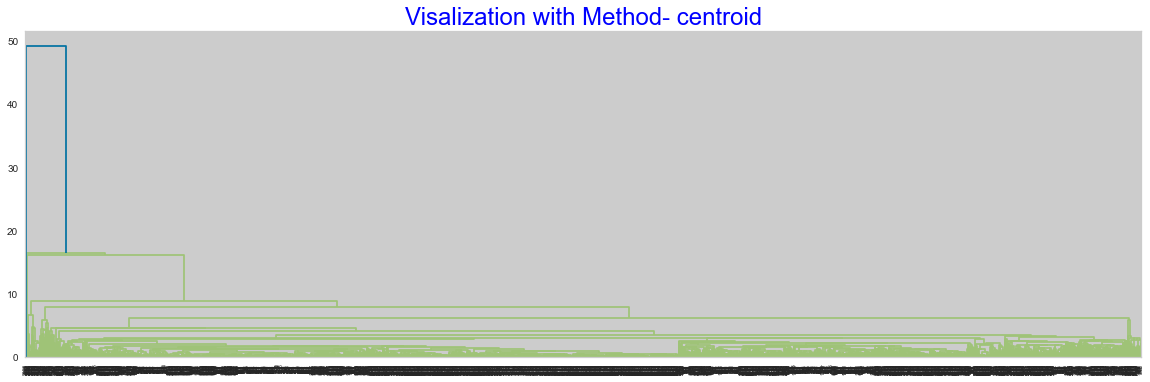

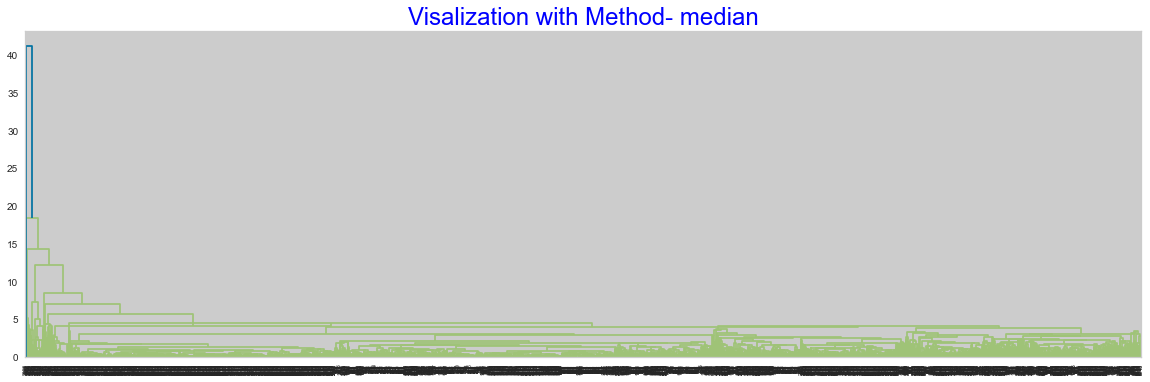

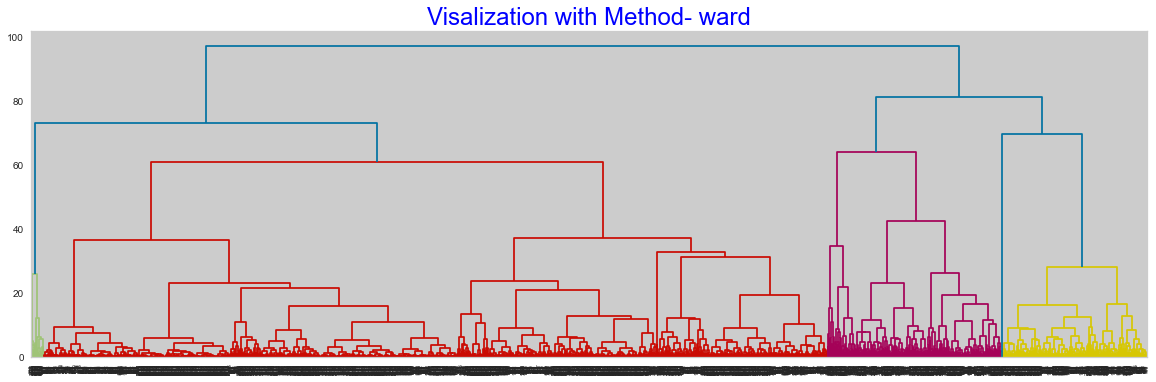

In [147]:
# Applying Dendrogram on the random "5%-removed" data using different linkage methods. 
# We can see number of clusters using color coding of dendrogram. Each color indicates one cluster.

import scipy.cluster.hierarchy as shc
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visalization with Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = shc.dendrogram(shc.linkage(df_norm2, method = methods,optimal_ordering=False))

<a id = "32"></a>
## 7.4) Agglomerative Clustering:

In [148]:
agg_clustering2 = AgglomerativeClustering(n_clusters=7, linkage='average')
y_pred_hie = agg_clustering.fit_predict(df_norm2)
print(y_pred_hie.shape)
y_pred_hie

(2950,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<a id = "33"></a>
# 8 - QUESTION IV : Use k-means algorithm, Does the same picture emerge?

Use k-means algorithm with the number of clusters you found in part (a). Does the same picture emerge? (___25 points___)

<a id = "34"></a>
## 8.1) Building Unsupervised KMeans Model

In [151]:
model1 = KMeans(n_clusters = 5, max_iter=50)
model1.fit(pca_std_df)

KMeans(max_iter=50, n_clusters=5)

In [152]:
# analysis of clusters formed

dataset1.index = pd.RangeIndex(len(dataset1.index))
df_km = pd.concat([dataset1,pd.Series(model1.labels_)],axis=1)
df_km.columns = ["Balance", "Qual_miles", "cc1_miles", "cc2_miles", "cc3_miles", "Bonus_miles", "Bonus_trans", "Flight_miles_12mo", "Flight_trans_12", "Days_since_enroll", "ClusterID"]   

In [153]:
df_km.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
ClusterID            0
dtype: int64

In [154]:
df_km

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,ClusterID
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...
3100,18476,0,1,1,1,8525,4,200,1,1403,0
3101,64385,0,1,1,1,981,5,0,0,1395,0
3102,73597,0,3,1,1,25447,8,0,0,1402,4
3103,54899,0,1,1,1,500,1,500,1,1401,1


In [155]:
dataset1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,16420,0,1,1,1,0,0,0,0,6942


In [157]:
km_cluster_Balance = pd.DataFrame(df_km.groupby('ClusterID')['Balance'].mean())
km_cluster_Qual_miles = pd.DataFrame(df_km.groupby('ClusterID')['Qual_miles'].mean())
km_cluster_cc1_miles = pd.DataFrame(df_km.groupby('ClusterID')['cc1_miles'].mean())
km_cluster_cc2_miles = pd.DataFrame(df_km.groupby('ClusterID')['cc2_miles'].mean())
km_cluster_cc3_miles = pd.DataFrame(df_km.groupby('ClusterID')['cc3_miles'].mean())
km_cluster_Bonus_miles = pd.DataFrame(df_km.groupby('ClusterID')['Bonus_miles'].mean())
km_cluster_Bonus_trans = pd.DataFrame(df_km.groupby('ClusterID')['Bonus_trans'].mean())
km_cluster_Flight_miles_12mo = pd.DataFrame(df_km.groupby('ClusterID')['Flight_miles_12mo'].mean())
km_cluster_Flight_trans_12 = pd.DataFrame(df_km.groupby('ClusterID')['Flight_trans_12'].mean())
km_cluster_Days_since_enroll = pd.DataFrame(df_km.groupby('ClusterID')['Days_since_enroll'].mean())


df = pd.concat([pd.Series([1,2,3,4,5]),
km_cluster_Balance,
km_cluster_Qual_miles,
km_cluster_cc1_miles,
km_cluster_cc2_miles,
km_cluster_cc3_miles,
km_cluster_Bonus_miles,
km_cluster_Bonus_trans,
km_cluster_Flight_miles_12mo,
km_cluster_Flight_trans_12,
km_cluster_Days_since_enroll],axis=1)
df.columns = ["ClusterID","Balance", "Qual_miles", "cc1_miles", "cc2_miles", "cc3_miles", "Bonus_miles",  "Bonus_trans", "Flight_miles_12mo", "Flight_trans_12", "Days_since_enroll"]
df

,ClusterID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,29100.827408,33.038991,1.091170,1.000000,1.000000,2954.062500,5.551032,6.807339,0.047592,3596.078555
1,2,61743.243767,107.052632,1.692521,1.000000,1.000000,10415.767313,10.080332,475.141274,1.875346,4037.606648
2,3,73624.466667,5546.666667,1.833333,1.000000,1.000000,12351.233333,9.733333,157.233333,0.600000,3216.366667
3,4,40919.558824,0.000000,1.088235,2.323529,1.000000,12405.235294,14.647059,75.000000,0.382353,3827.235294
4,5,76270.112179,38.037393,3.252137,1.000000,1.005342,26296.988248,16.677350,30.304487,0.131410,4517.017094


<a id = "35"></a>

## 8.2) Analyzing Clusters

<AxesSubplot:xlabel='ClusterID', ylabel='Balance'>

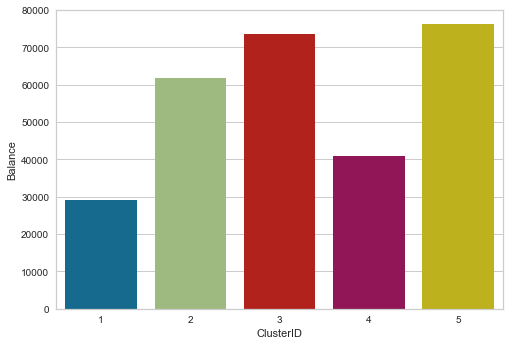

In [158]:
sns.barplot(data=df,x='ClusterID',y='Balance')

<AxesSubplot:xlabel='ClusterID', ylabel='Qual_miles'>

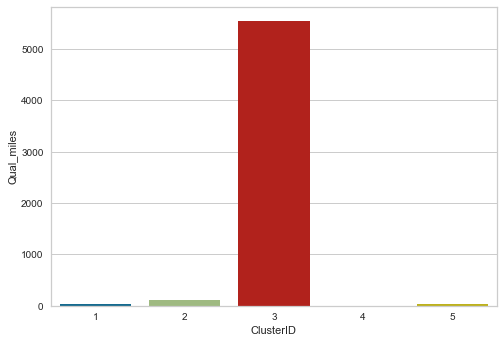

In [159]:
sns.barplot(data=df,x='ClusterID',y='Qual_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='cc1_miles'>

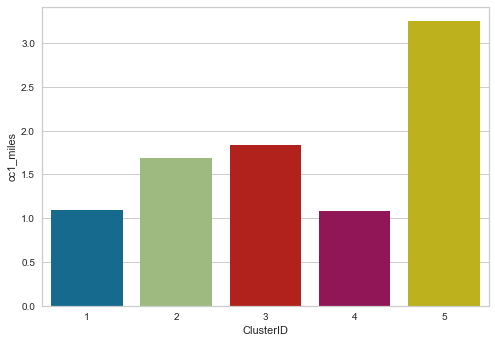

In [160]:
sns.barplot(data=df,x='ClusterID',y='cc1_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='cc2_miles'>

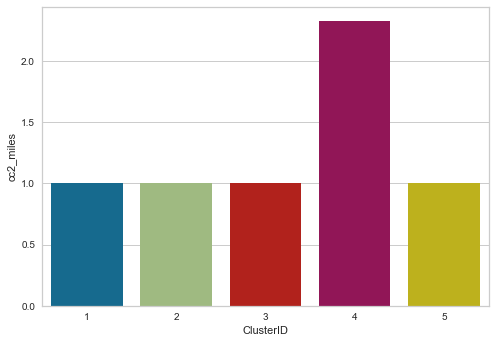

In [161]:
sns.barplot(data=df,x='ClusterID',y='cc2_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='cc3_miles'>

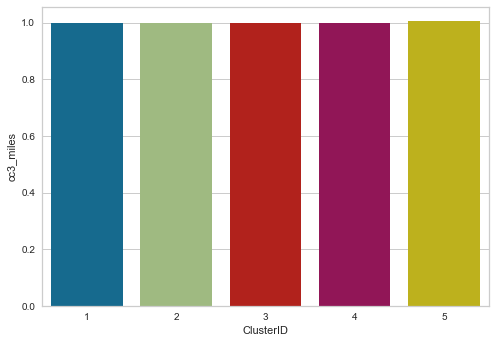

In [162]:
sns.barplot(data=df,x='ClusterID',y='cc3_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='Bonus_miles'>

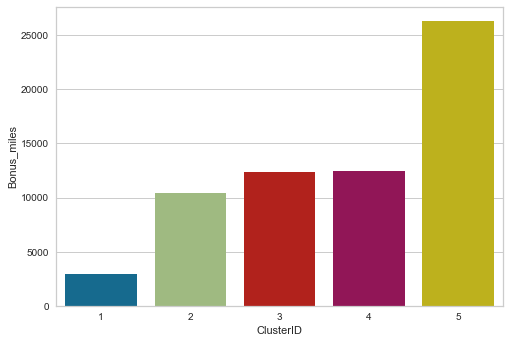

In [163]:
sns.barplot(data=df,x='ClusterID',y='Bonus_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='Bonus_trans'>

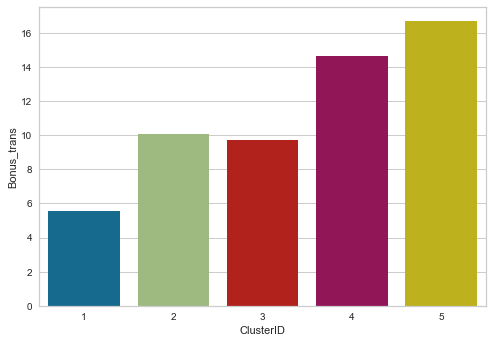

In [164]:
sns.barplot(data=df,x='ClusterID',y='Bonus_trans')

<AxesSubplot:xlabel='ClusterID', ylabel='Flight_miles_12mo'>

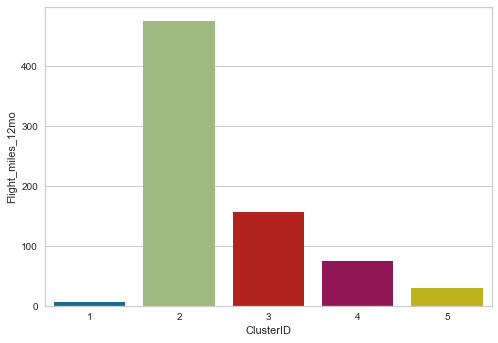

In [165]:
sns.barplot(data=df,x='ClusterID',y='Flight_miles_12mo')

<AxesSubplot:xlabel='ClusterID', ylabel='Flight_trans_12'>

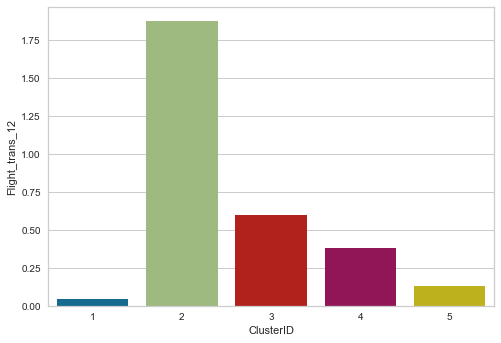

In [166]:
sns.barplot(data=df,x='ClusterID',y='Flight_trans_12')

<AxesSubplot:xlabel='ClusterID', ylabel='Days_since_enroll'>

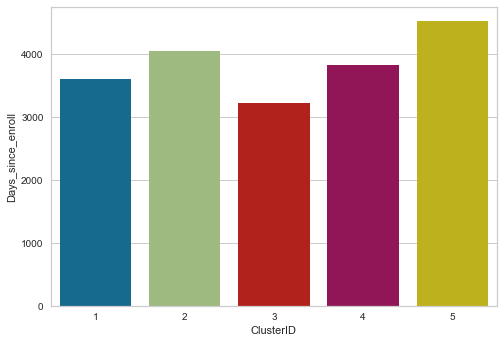

In [167]:
sns.barplot(data=df,x='ClusterID',y='Days_since_enroll')

In [168]:
df.columns

Index(['ClusterID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles',
       'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo',
       'Flight_trans_12', 'Days_since_enroll'],
      dtype='object')

In [172]:
# what are clusters' strong points?

details_array = pd.DataFrame({"1":["-","-","-","-","-"],"2":["Flight_miles_12mo","Flight_trans_12","-","-","-"], "3":['Qual_miles',"-","-","-","-"], "4":['cc2_miles',"-","-","-","-"], "5":['Days_since_enroll',"cc1_miles","Bonus_miles","Bonus_trans","Balance",]})
details_array

,1,2,3,4,5
0,-,Flight_miles_12mo,Qual_miles,cc2_miles,Days_since_enroll
1,-,Flight_trans_12,-,-,cc1_miles
2,-,-,-,-,Bonus_miles
3,-,-,-,-,Bonus_trans
4,-,-,-,-,Balance


<a id = ""></a>
# 5 -  QUESTION V : Which clusters would you target for offers?
- Which clusters would you target for offers, and what type of offers would you target to customers in that cluster? (___20 points___)